# PW 1 : linear models

For this PW, you only need to edit the code blocks with the "# edit here" comment.

We will use different python package :
*   pandas : to store and handle data
*   numpy : to store the data and do the computation
*   sklearn : to import the data and evaluate models
*   matplotlib : to plot data and results
*   seaborn : to extend matplotlib

We can now import the packages :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets  as ds

# import warnings
# warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

## The Diabetes dataset

This dataset is about predicting the level of disease progression for patient with diabetes.

We can load the dataset usign sklearn :

In [2]:
dataset = ds.load_diabetes()

Display the list of all attribute of the loaded dataset :

In [3]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

We can display the desciption of each features :

In [5]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Now create a dataframe with `pd.DataFrame()` that contains both the input (`.data`) and the outcome (`.target`) with column name 'value'. You can use the argument `columns=` to add the name of the columns

In [6]:
# edit here
df = pd.DataFrame(data=np.hstack((dataset.data, dataset.target.reshape(-1, 1))), columns=dataset.feature_names + ['value'])

We can now print some stats about the data with `describe()` and the the first five rows with `head()` and some general info about the dataset with `info()`

In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,value
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


You can note that all features are real values in the range [-0.2, 0.2], even age or sex, meanaing that they have been normalized partially for anoymous reasons. This si common in medical domain.



In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,value
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  value   442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


We will the just check if there are NaN values :

In [10]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


We can obtain a bit more information about the distribution of the data with the following code

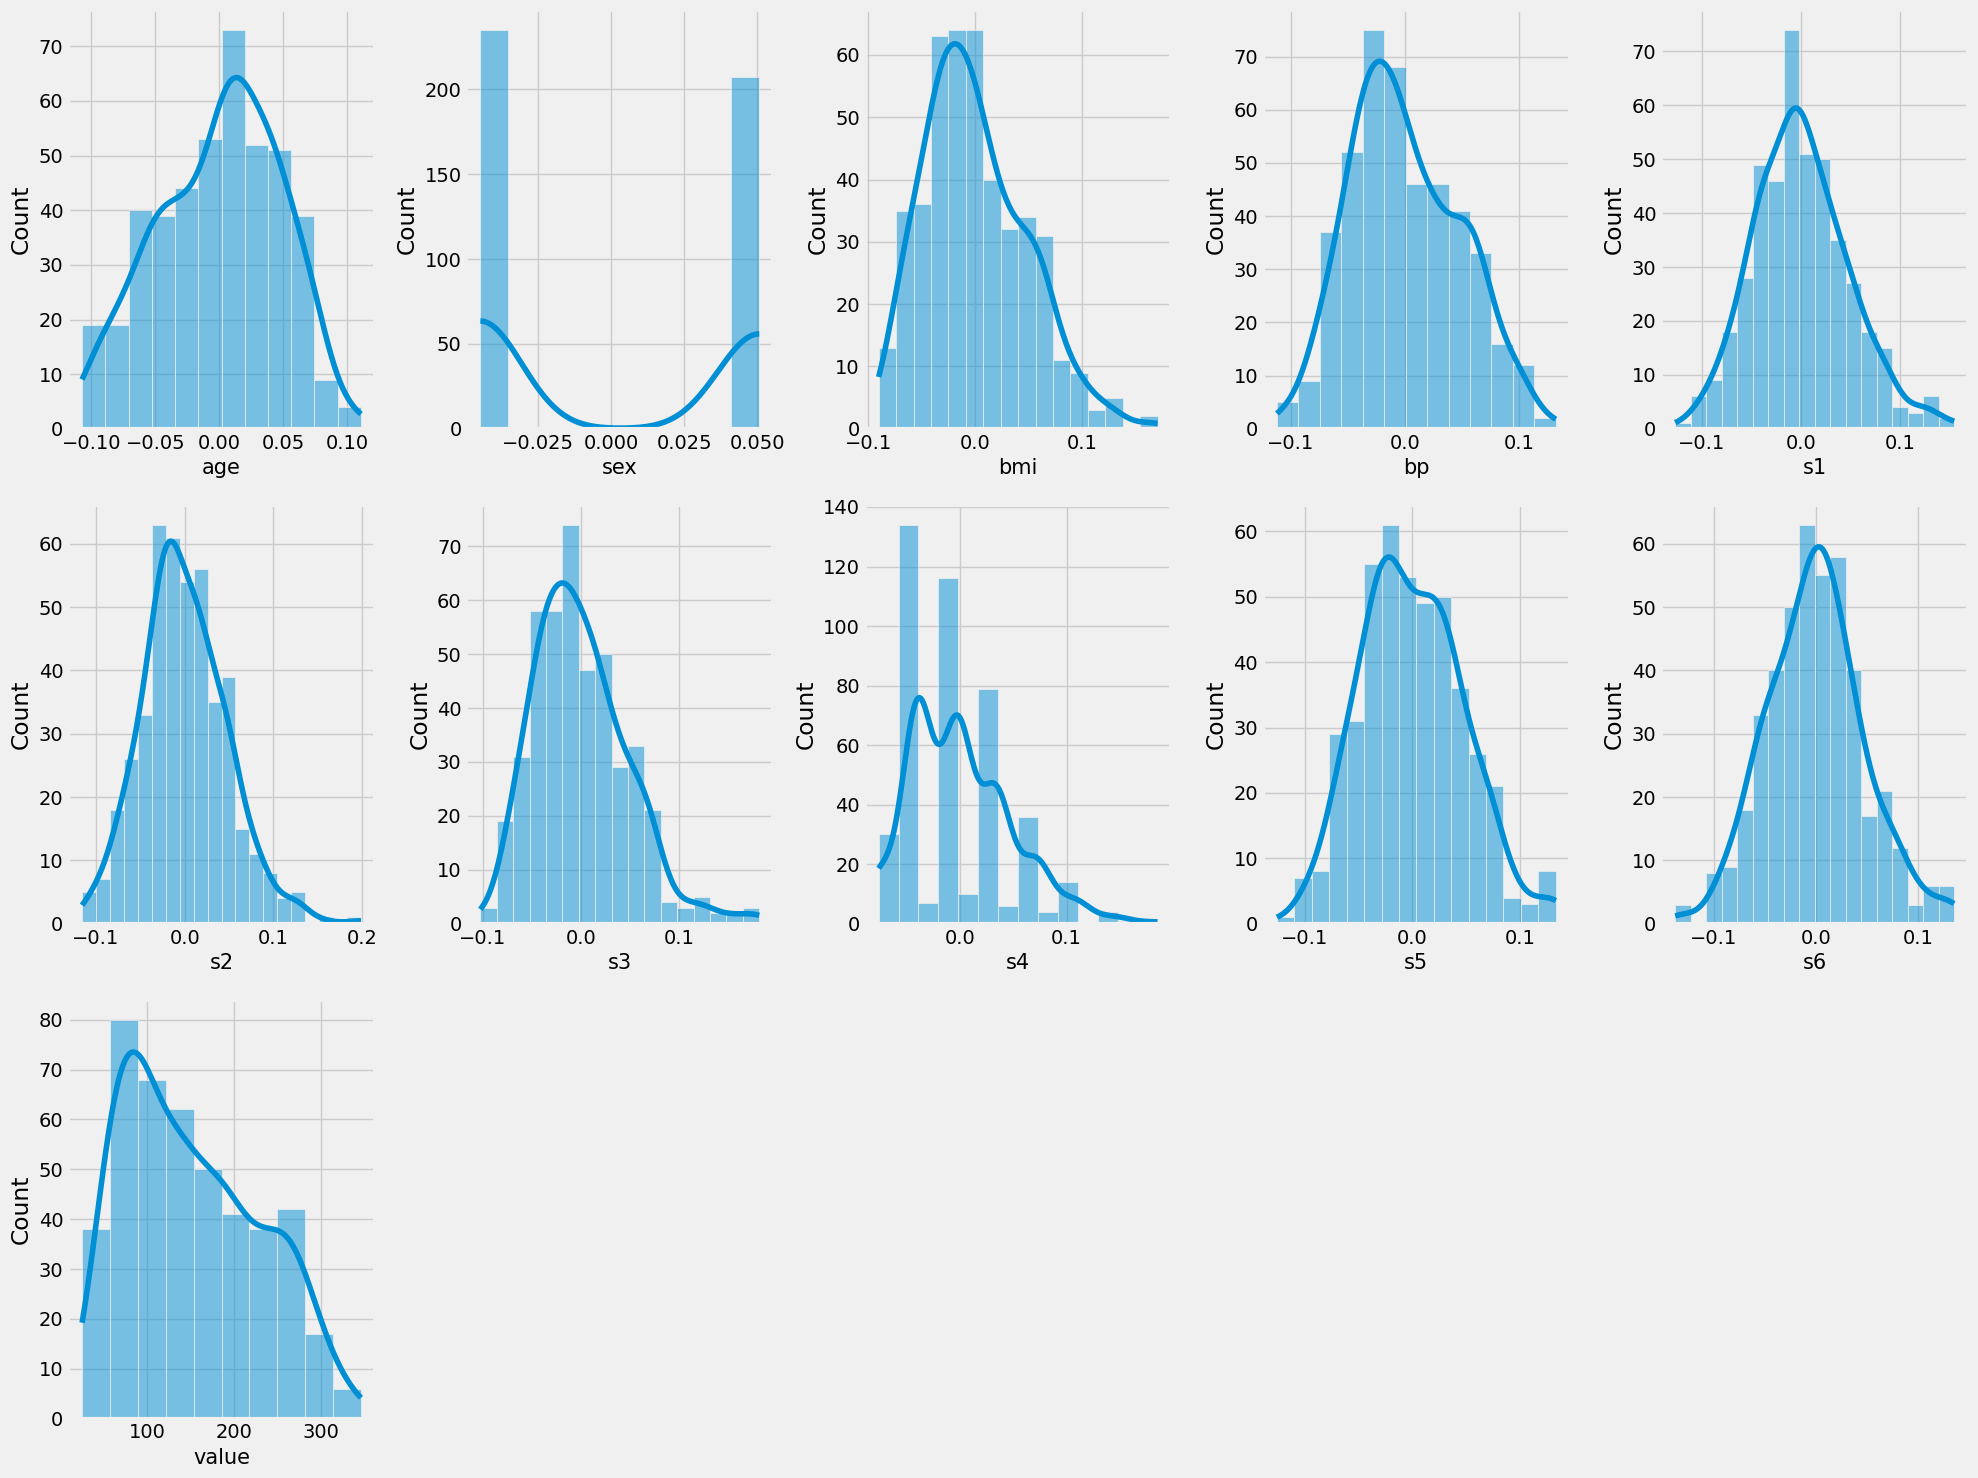

In [11]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

Here most fetaures follow a gaussian like distribution, note that it is not necessary the case.

Another interessting figure, is to plot each features in respect to our outcome to see if there are some correlation showing.

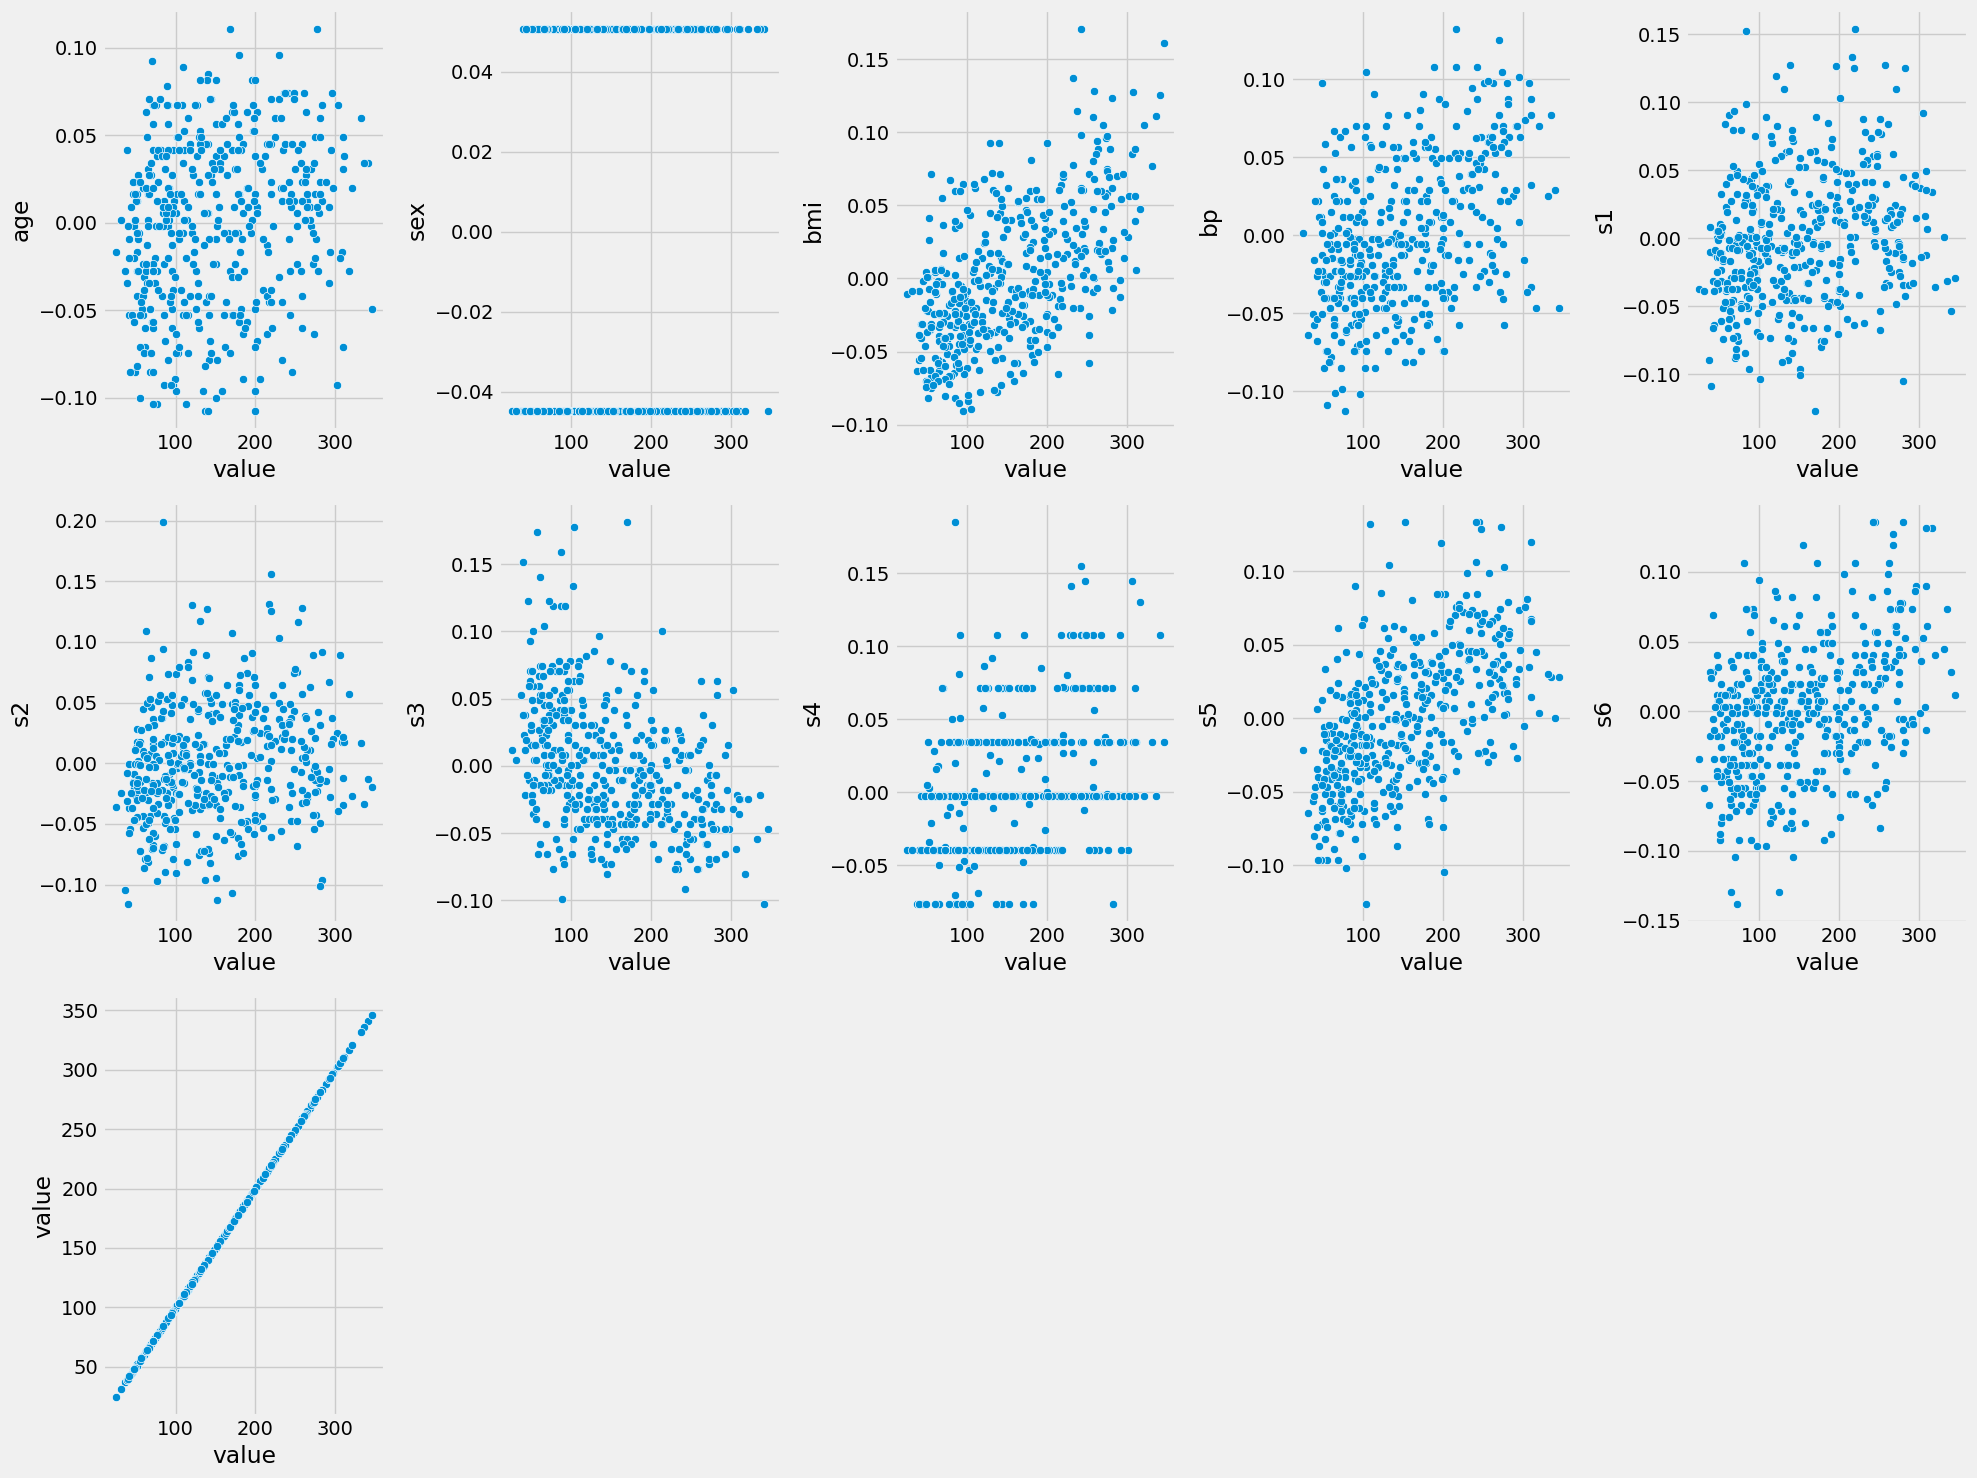

In [12]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['value'], y = df[column])

    plotnumber += 1

plt.tight_layout()
plt.show()

Which feature seems the most correlated (excepted 'value' itself) ? which one seems not correlated at all ?

### Prepare the data

#### Pandas data manipulation

Display the `DataFrame.index` `DataFrame.columns` for df


In [14]:
# edit here
print("Index:", df.index)
print("Columns:", df.columns)

Index: RangeIndex(start=0, stop=442, step=1)
Columns: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'value'], dtype='object')


You can convert it to a numpy array if needed with `DataFrame.to_numpy`

In [18]:
# edit here
df_np = df.to_numpy()
print("DataFrame as numpy array:\n", df_np)

DataFrame as numpy array:
 [[ 3.80759064e-02  5.06801187e-02  6.16962065e-02 ...  1.99074862e-02
  -1.76461252e-02  1.51000000e+02]
 [-1.88201653e-03 -4.46416365e-02 -5.14740612e-02 ... -6.83315471e-02
  -9.22040496e-02  7.50000000e+01]
 [ 8.52989063e-02  5.06801187e-02  4.44512133e-02 ...  2.86130929e-03
  -2.59303390e-02  1.41000000e+02]
 ...
 [ 4.17084449e-02  5.06801187e-02 -1.59062628e-02 ... -4.68825342e-02
   1.54907302e-02  1.32000000e+02]
 [-4.54724779e-02 -4.46416365e-02  3.90621530e-02 ...  4.45287288e-02
  -2.59303390e-02  2.20000000e+02]
 [-4.54724779e-02 -4.46416365e-02 -7.30303027e-02 ... -4.22151394e-03
   3.06440941e-03  5.70000000e+01]]


For a `DataFrame`, passing a single label selects a columns and
yields a `Series` equivalent to `df.A`. Test it with column `age`

In [17]:
# edit here
age_series = df['age']
print("Age series head:\n", age_series.head())

Age series head:
 0    0.038076
1   -0.001882
2    0.085299
3   -0.089063
4    0.005383
Name: age, dtype: float64


For a `DataFrame`, passing a slice `:` selects matching rows (instances). Test with instances 5 to 10.

In [19]:
# edit here
slice_df = df[5:10]
print("Rows 5 to 10:\n", slice_df)


Rows 5 to 10:
         age       sex       bmi        bp        s1        s2        s3  \
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  value  
5 -0.076395 -0.041176 -0.096346   97.0  
6 -0.039493 -0.062917 -0.038357  138.0  
7  0.017703 -0.035816  0.003064   63.0  
8 -0.002592 -0.014960  0.011349  110.0  
9 -0.002592  0.067737 -0.013504  310.0  


You can select a row by index with `df.iloc[..]` like in numpy. Select the examples from 5 to 10 but only the two last columns (you can use '-' index to select an index from the end, -2 in our case)

In [20]:
# edit here
iloc_df = df.iloc[5:10, -2:]
print("Rows 5 to 10, last two columns:\n", iloc_df)

Rows 5 to 10, last two columns:
          s6  value
5 -0.096346   97.0
6 -0.038357  138.0
7  0.003064   63.0
8  0.011349  110.0
9 -0.013504  310.0


You can do the same with `df.loc[..]` but with rows and columns names. Note that in our cas the row have no nammed index, hence you can use the index for the row.
Do that to display the first 10 rows but for columns `"age"`and `"value"`.

In [21]:
# edit here
loc_df = df.loc[:9, ['age', 'value']]
print("First 10 rows, columns 'age' and 'value':\n", iloc_df)

First 10 rows, columns 'age' and 'value':
          s6  value
5 -0.096346   97.0
6 -0.038357  138.0
7  0.003064   63.0
8  0.011349  110.0
9 -0.013504  310.0


You can also use boolean indexing. Select rows where `df.value` is greater than `300`.

In [22]:
# edit here
bool_df = df[df['value'] > 300]
print("Rows with value > 300:\n", bool_df)

Rows with value > 300:
           age       sex       bmi        bp        s1        s2        s3  \
9   -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   
32   0.034443  0.050680  0.125287  0.028758 -0.053855 -0.012900 -0.102307   
102 -0.092695 -0.044642  0.028284 -0.015999  0.036958  0.024991  0.056003   
138  0.034443  0.050680  0.111276  0.076958 -0.031840 -0.033881 -0.021311   
141 -0.027310 -0.044642  0.047685 -0.046985  0.034206  0.057245 -0.080217   
250  0.067136 -0.044642  0.056307  0.073515 -0.013953 -0.039205 -0.032356   
254  0.030811  0.050680  0.056307  0.076958  0.049341 -0.012274 -0.036038   
256 -0.049105 -0.044642  0.160855 -0.046985 -0.029088 -0.019790 -0.047082   
262 -0.016412  0.050680  0.127443  0.097615  0.016318  0.017475 -0.021311   
290  0.059871  0.050680  0.076786  0.025315  0.001183  0.016849 -0.054446   
336 -0.020045 -0.044642  0.085408 -0.036656  0.091996  0.089499 -0.061809   
359  0.038076  0.050680  0.005650  0.032201  0.00668

You can also use `df[A].isin([ ... ])`. Select rows where `df.value` is either `45` or `113`.

In [23]:
# edit here
isin_df = df[df['value'].isin([45, 113])]
print("Rows with value 45 or 113:\n", isin_df)

Rows with value 45 or 113:
           age       sex       bmi        bp        s1        s2        s3  \
79  -0.103593 -0.044642 -0.037463 -0.026328  0.002559  0.019980  0.011824   
266 -0.052738  0.050680 -0.062252  0.011544 -0.008449 -0.036700  0.122273   
343 -0.020045 -0.044642  0.018584  0.090729  0.003935  0.008707  0.037595   
413 -0.052738 -0.044642 -0.000817 -0.026328  0.010815  0.007141  0.048640   

           s4        s5        s6  value  
79  -0.002592 -0.068332 -0.025930  113.0  
266 -0.076395 -0.086827  0.003064   45.0  
343 -0.039493 -0.057803  0.007207  113.0  
413 -0.039493 -0.035816  0.019633  113.0  


#### Application on the dataset

We will now prepare the data to train our model. We will extrat it into two numpy arrays, but frist for simplicity we will only work the `"bmi"` column for the input.

In [36]:
# edit here
# extract x as "bmi" column
# extract y as "value" column
x=df['bmi'].to_numpy()
y=df['value'].to_numpy()

Check the dimension of your training set with `.shape` attribute

In [37]:
# edit here
print("x shape before reshape:", x.shape)
print("y shape before reshape:", y.shape)

x shape before reshape: (442,)
y shape before reshape: (442,)


We need to apply two modifications :
* each input is a scalar, but we want to apply our regression on a vector, use the `reshape(-1, 1)` method on x and y.
* we need to apply the x_0 trick for the intercept term, use the `np.ones()` function to generate array of ones  and `np.hstack()` to concatenate them.

In [38]:
# edit here
x = np.hstack((np.ones((x.shape[0], 1)), x.reshape(-1, 1)))
y = y.reshape(-1, 1)

Check the shape of your training set, and the first vector of your array to validate your modifications.

In [39]:
# edit here
print("x shape after adding intercept:", x.shape)
print("First row of x:", x[0])

x shape after adding intercept: (442, 2)
First row of x: [1.         0.06169621]


Finally, we will use the `train_test_split` function to split our data, 30% for test 70% for train. Use a `random_state` to have a fixed random seed. It is usual to use a small portion of the dataset for the test to leave more information for the training process, especially when the dataset is small.
Also, note that we will not use a validation set this time as we don't want to fine tune any hyperparameters.

In [40]:
from sklearn.model_selection import train_test_split
# edit here :
# store the train and test sets into x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("x_train shape:", x_train.shape, "x_test shape:", x_test.shape)

x_train shape: (309, 2) x_test shape: (133, 2)


## Linear regression
### Model creation and training

First, we need to create the variable that that will contain our linear regression weights. What shpe should it have ? You can use the `np.random.randn()` function to do so.

In [41]:
# edit here
theta = np.random.randn(x_train.shape[1], 1)
print("Initial theta:", theta)

Initial theta: [[ 2.02283672]
 [-2.58587633]]


We will then define the fucntion to compute our loss. Use the `np.dot()` function to compute the inner prodecut of x and theta

In [42]:
def compute_loss(x, y, theta):
  # edit here
  predictions = np.dot(x, theta)
  loss = np.mean((predictions - y) ** 2)
  return loss

We can plot the loss. Note that in pratice this not feasible when the number of dimension is high. Note taht it can take few minutes to compute

[[14676.55498171 14457.81668725 14243.32120184 ... 13213.45934464
  13406.27352779 13603.33051999]
 [14465.44333761 14246.9531099  14032.70569123 ... 13026.41017491
  13219.47242481 13416.77748376]
 [14258.33128539 14040.08912442 13826.08977251 ... 12843.36059706
  13036.67091371 13234.2240394 ]
 ...
 [12820.8252899  12626.14946981 12435.71645877 ... 13691.78966682
  13908.66632434 14129.78579091]
 [12997.674058   12803.24630466 12613.06136037 ... 13892.70090929
  14109.82563356 14331.19316688]
 [13178.52241799 12984.34273139 12794.40585384 ... 14097.61174364
  14314.98453466 14536.60013473]]


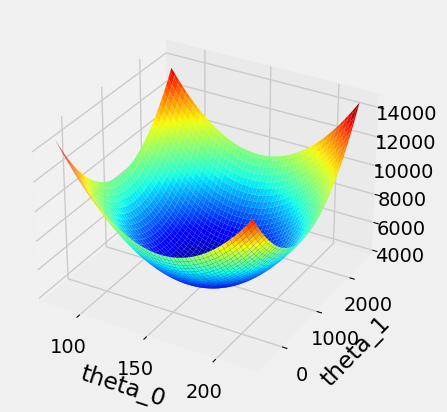

In [43]:
# Grid over which we will calculate J
theta0_vals = np.linspace(80, 220, 100)
theta1_vals = np.linspace(-500, 2500, 100)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros([len(theta0_vals), len(theta1_vals)])

# Fill out J_vals
for i, theta0_val in enumerate(theta0_vals):
    for j, theta1_val in enumerate(theta1_vals):
        theta_val = np.array([[theta0_val], [theta1_val]])
        J_vals[i, j] = compute_loss(x_train, y_train, theta_val)

print(J_vals)
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# Surface plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
xa, ya = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(xa, ya, J_vals, cmap='jet')
plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.show()


We can now define the gradient computation. This is called the backward path for neural networks.

In [47]:
def gradient_descent(X, y, theta, alpha, num_iters):
    # history will be used to strore the evolution of the loss through the training process
    history = np.zeros((int(num_iters), 1))
    # edit here
    m = y.shape[0]  # number of training examples
    for i in range(int(num_iters)):
        # Compute predictions
        predictions = np.dot(X, theta)
        # Compute the error
        error = predictions - y
        # Compute the gradient (derivative of the loss with respect to theta)
        gradient = np.dot(X.T, error) / m
        # Update theta by moving in the direction opposite to the gradient
        theta = theta - alpha * gradient
        # Record the loss in history
        history[i] = compute_loss(X, y, theta)
    return theta, history

Finally, we can train our model. It can take a few minutes. In our setting, we used a high value for alpha because the outcome value is multiple order of magnitude bigger than our input, meaning that a normal change on the weight value will have a very small change on the predicted value. Note that we could also have normalized y.

In [48]:
iterations = 6000
alpha = 0.001

theta, hist = gradient_descent(x_train, y_train, theta, alpha, iterations)


What are the values of our model ?

In [50]:
# edit here
print("Final theta:", theta)

Final theta: [[153.83651813]
 [ 24.84150724]]


### Model evaluation
A stantard evalutation for our regression model is the Mean Squared Error (MSE). However, the metric squares the error, making it difficult to interpret. Thus, we will use the Mean absolute error (MAE), we could have used the Root Mean Squared Error (RMSE) too.

In [51]:
from sklearn.metrics import mean_absolute_error
# edit here
y_pred = np.dot(x_test, theta)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 63.70840590962685


We can also visualize our model

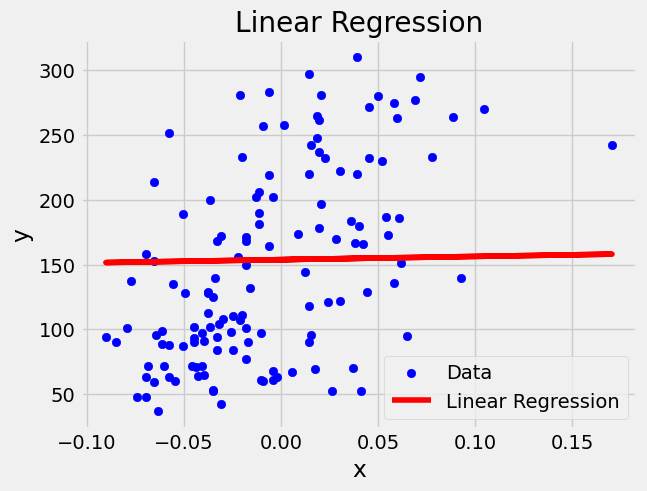

In [52]:
plt.scatter(x_test[:,1].flatten(), y_test.flatten(), color='blue', label='Data')
plt.plot(x_test[:,1].flatten(), x_test.dot(theta).flatten(), color='red', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


### Sklearn implementation
Let's compare our model with sklearn linear regression :

In [56]:
from sklearn.linear_model import LinearRegression

# edit here
# you can use your previous code to generate your train and test set.
# However, this time you don't need to had the $x_0$ feature
# Using the original 'bmi' column (without the added intercept column)
x_sklearn = df['bmi'].to_numpy().reshape(-1, 1)
y_sklearn = df['value'].to_numpy().reshape(-1, 1)
x_train_sklearn, x_test_sklearn, y_train_sklearn, y_test_sklearn = train_test_split(
    x_sklearn, y_sklearn, test_size=0.3, random_state=42
)

lr = LinearRegression()
lr.fit(x_train_sklearn, y_train_sklearn)



LinearRegression()

You can print the slope coefficients and the intercept. Are they (very) different ?

In [57]:
print(lr.intercept_)
print(lr.coef_)

[151.04202449]
[[988.41931249]]


We can also evaluate this model. There is a `score()` method in the `LinearRegression` object. It implements the $R^2$ score. COmpare it to the MAE, you can use the `predict()` method from your model.

In [59]:
# edit here
# Evaluate the sklearn model using its score() method (R² score)
r2_score = lr.score(x_test_sklearn, y_test_sklearn)
print("R² score:", r2_score)

# Use the predict() method to generate predictions on the test set and compute the Mean Absolute Error (MAE)
y_pred = lr.predict(x_test_sklearn)
mae = mean_absolute_error(y_test_sklearn, y_pred)
print("Mean Absolute Error (MAE):", mae)


R² score: 0.2803417492440603
Mean Absolute Error (MAE): 50.59307504375872


### Multivariate Linear Regression

Using sklearn implementation, compute a new model that uses all available features. We will use different variables names for x and y, so we can use them afterwards

In [60]:
# edit here
# extract x from the data frame df and check the size of x afterwards

# extract y as the "value" column

# store the train and test sets into x_train, x_test, y_train, y_test

#apply the necessary conversions and train the model
# Extract all feature columns (all columns except 'value') and the target 'value'
x_multi = df[dataset.feature_names].to_numpy()
y_multi = df['value'].to_numpy().reshape(-1, 1)

# Check the shapes of x and y
print("x_multi shape:", x_multi.shape)
print("y_multi shape:", y_multi.shape)

# Split the data into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(
    x_multi, y_multi, test_size=0.3, random_state=42
)
print("x_train_multi shape:", x_train_multi.shape, "x_test_multi shape:", x_test_multi.shape)

# Train the multivariate linear regression model using sklearn
from sklearn.linear_model import LinearRegression
lr_multi = LinearRegression()
lr_multi.fit(x_train_multi, y_train_multi)

# Display the model coefficients and intercept
print("Multivariate model coefficients:", lr_multi.coef_)
print("Multivariate model intercept:", lr_multi.intercept_)


x_multi shape: (442, 10)
y_multi shape: (442, 1)
x_train_multi shape: (309, 10) x_test_multi shape: (133, 10)
Multivariate model coefficients: [[  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
   506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]]
Multivariate model intercept: [151.00821291]


Similarly, what are the parameters of our model ? and what is the MAE and $R^2$ score ?


In [62]:
# edit here
# Print the multivariate model parameters
print("Multivariate model coefficients:", lr_multi.coef_)
print("Multivariate model intercept:", lr_multi.intercept_)

# Predict on the test set
y_pred_multi = lr_multi.predict(x_test_multi)

# Compute evaluation metrics: Mean Absolute Error (MAE) and R² score
from sklearn.metrics import mean_absolute_error, r2_score
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("Multivariate Mean Absolute Error (MAE):", mae_multi)
print("Multivariate R² score:", r2_multi)


Multivariate model coefficients: [[  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
   506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]]
Multivariate model intercept: [151.00821291]
Multivariate Mean Absolute Error (MAE): 41.91937845679274
Multivariate R² score: 0.4772897164322617


## Logistic regression

### Update the dataset for classification

For this exercice we will create two classes : is the patient have a high or low degree of diabedes.
We will fix a threashold at 150. Note that is only in the purpose of the exercices and it has nothing to do to particular medical explanations.

We will keep the actual dataset and modify only the labels (y_\*). To do so, we need to convert y_\* to be 0 or 1. You can use `np.where()` function to do that.

You will do it for both the univariate and multivariate versions.


In [63]:
# edit here
# Set the threshold for classifying high vs low degree of diabetes
threshold = 150

# Update labels for the univariate dataset (using the "bmi" feature)
# Here, y was previously extracted from the "value" column
y = np.where(y >= threshold, 1, 0).reshape(-1, 1)

# Update labels for the multivariate dataset (using all features)
# Here, y_multi was previously extracted from the "value" column
y_multi = np.where(y_multi >= threshold, 1, 0).reshape(-1, 1)

# Check the updated labels for both datasets
print("Updated univariate labels (first 10):", y[:10])
print("Updated multivariate labels (first 10):", y_multi[:10])


Updated univariate labels (first 10): [[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
Updated multivariate labels (first 10): [[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


#### Monovariate logisitic regression

Train and evaluate the univariate version with sklearn implementation `LogisticRegression`. In this case `score()` gives you the accuracy, so you can directly use it.

In [64]:
from sklearn.linear_model import LogisticRegression

# edit here
# Extract the univariate feature ("bmi") and prepare the target labels
x_log = df['bmi'].to_numpy().reshape(-1, 1)
y_log = np.where(df['value'].to_numpy() >= threshold, 1, 0)

# Split the data into training and testing sets (70% train, 30% test)
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size=0.3, random_state=42)

# Create and train the Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(x_train_log, y_train_log)

# Evaluate the model using the score() method, which returns the accuracy
accuracy = log_model.score(x_test_log, y_test_log)
print("Univariate Logistic Regression Accuracy:", accuracy)

Univariate Logistic Regression Accuracy: 0.6240601503759399


Check the parameters

In [65]:
# edit here
# Check the parameters of the univariate logistic regression model
print("Univariate Logistic Regression Coefficient:", log_model.coef_)
print("Univariate Logistic Regression Intercept:", log_model.intercept_)

Univariate Logistic Regression Coefficient: [[2.78570622]]
Univariate Logistic Regression Intercept: [-0.14452866]


We can now compare the two decision function

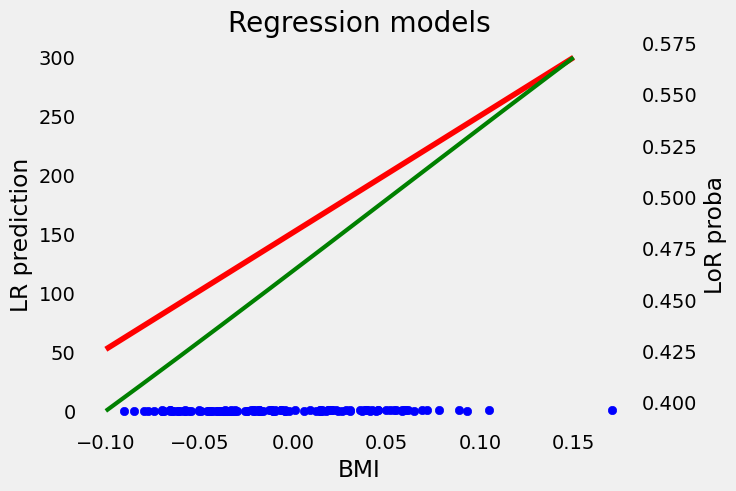

In [67]:
from scipy.special import expit

# minimal changes: define lor and use x_test and y_test
lor = log_model
x_test = x_test_log
y_test = y_test_log

lor_pred = lor.predict_proba(x_test)
lr_pred = lr.predict(x_test)

fig, ax = plt.subplots()
twin = ax.twinx()
twin.grid(False)
ax.grid(False)

# plot the data
p1 = ax.scatter(x_test.flatten(), y_test.flatten(), color='blue', label='Data')
x_dummy = np.linspace(-0.1,0.15, 200)

# plot the linear regression
p2 = ax.plot(x_dummy, lr.predict(x_dummy.reshape(-1,1)), color='red', label='Linear Regression')
# plot the logistic regression
y_lor = expit(x_dummy * lor.coef_ + lor.intercept_).ravel()
p3 = twin.plot(x_dummy, y_lor, label="Logistic Regression Model", color="green", linewidth=3)

# display the plot
ax.set_xlabel("BMI")
ax.set_ylabel("LR prediction")
twin.set_ylabel("LoR proba")

plt.title('Regression models')
plt.show()

### Multivariate logisitic regression

Train and evaluate the multivariate version with sklearn implementation `LogisticRegression`.

In [68]:
# edit here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the multivariate dataset (features: all feature columns, labels: y_multi)
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(
    x_multi, y_multi, test_size=0.3, random_state=42
)

lor_multi = LogisticRegression(random_state=42, max_iter=1000)
lor_multi.fit(x_train_multi, y_train_multi.ravel())

# Evaluate the model using the score() method, which returns the accuracy
accuracy_multi = lor_multi.score(x_test_multi, y_test_multi)
print("Multivariate Logistic Regression Accuracy:", accuracy_multi)

print("Multivariate Logistic Regression Coefficients:", lor_multi.coef_)
print("Multivariate Logistic Regression Intercept:", lor_multi.intercept_)

Multivariate Logistic Regression Accuracy: 0.7744360902255639
Multivariate Logistic Regression Coefficients: [[ 0.6211224  -0.44906443  2.26313037  2.00521184  0.33265674  0.06397644
  -1.49230744  1.34768342  2.19687998  1.43559779]]
Multivariate Logistic Regression Intercept: [-0.16256201]
